<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |  **100**
|--------------------------|--------
|  **Weight**              |  **20% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Friday, May 24**
|  **Submission mode**     |  **Electronic, Using GitLab <br/> One submission per group**
|  **Estimated time**      |  **20 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-2.ipynb` and any other additional files that you may have created / hyperlinked in this notebook, as part of your submission by pushing it to your forked GitLab repository. You need to add your group details below. Make sure your group works on and submits only have one fork of the assignment repository. 


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted.

<span style="color:blue">
    
### Group Number :  2420_A2_Grp12

### Student IDs: u6555407, u6588836, u6611178

</span>

## Introduction



In [9]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [10]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL
### TODO SECTION A: q4 & SECTION B Q1.1
#### We might need actor name and corresponding actor id.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from itertools import combinations 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import svm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Section A - Database Management (15 Marks)

You have been given the following database containing 15 tables relating to **DVD Movie Rentals**. The data contained in these tables is as follows -

|  **Table**               |  **Data Description**      |
|--------------------------|----------------------------|
|  actor                   |  actors data including first name and last name     |
|  film                    |  films data such as title, release year, length, rating, etc      |
|  film_actor              |  stores the relationships between films and actors |
|  category                |  stores film’s categories data |
|  film_category           |  stores the relationships between films and categories | 
|  store                   |  store data including manager staff and address |
|  inventory               |  stores inventory data |
|  rental                  |  stores rental data |
|  payment                 |  stores customer's payments |
|  staff                   |  stores staff data |
|  customer                |  stores customer data |
|  address                 |  address data for staff and customers |
|  city                    |  stores city data |
|  country                 |  stores country data |

Visualizing the relations between these tables can be aided by looking at the below **E-R Diagram**.

<img src='./dvd_rental_er.png'>

Based on your understanding of the relationships between these tables, answer the following questions by writing SQL queries to get the required data rows from the database and display them as a **Pandas dataframe**. 

***
#### **NOTE**:
For the following questions, in the CSIT labs you will be able to connect directly to the database using the below code within the notebook. From outside of the CSIT labs, you will need to perform SQL queries in your terminal by using [partch](https://cs.anu.edu.au/docs/student-computing-environment/linuxlabs/remoteaccess/#connectingtopartch3). Once you have the correct query, you may just fill in the boxes below.

**Partch Instructions**
1. Connect to partch as per the above hyperlink
2. In your terminal, enter `psql` to access the sql database
3. Enter `\c dvdrental` to ensure you are accessing the assignment database (or simply specify dvdrental when connecting to the database server -- `psql dvdrental`).
4. (Sanity Check) Enter `SELECT * FROM actor;` . If you receive the first row to be "Penelope Guiness", you should be good to go !
***

In [3]:
# Connect using psycopg2
conn = psycopg2.connect(host="/var/run/postgresql", database="dvdrental")

# Activate connection cursor
curr = conn.cursor()

OperationalError: could not connect to server: No such file or directory
	Is the server running locally and accepting
	connections on Unix domain socket "/var/run/postgresql/.s.PGSQL.5432"?


In [ ]:
def execute_sql(query):
    # Select table and display
    curr.execute(query)

    # Fetches all the rows from the result of the query
    rows = curr.fetchall()
    
    # Gets the column names for the table
    colnames = [desc[0] for desc in curr.description]

    # Converts into readable pandas dataframe
    df_result = pd.DataFrame(rows, columns=colnames)
    return df_result

### 1. Write an SQL query to determine the total sales from the rentals of the film 'Affair Prejudice' from the rental store with `store_id = 2`. Your query should result in a single column called `Total Rental Cost` with the value of the total cost of all these rentals.
<span style= 'float: right;'><b>[3 marks]</b></span>

In [ ]:
# YOUR QUERY HERE
query = str("SELECT SUM(p.amount) AS TOTAL_RENTAL_COST"
            + " FROM payment AS p,rental AS r,inventory AS i,film AS f"
            + " WHERE p.rental_id=r.rental_id"
            + " AND r.inventory_id=i.inventory_id"
            + " AND i.film_id=f.film_id"
            + " AND f.title LIKE 'Affair Prejudice'"
            + " AND i.store_id=2;")

execute_sql(query)

### 2. Write an SQL query to retrieve the names of all customers who rented the film ‘Affair Prejudice’ from the store with `store_id = 1`. The result of your query should display each customer's first name and last name. 
<span style= 'float: right;'><b>[3 marks]</b></span>

In [ ]:
# YOUR QUERY HERE
query = str("SELECT c.first_name,c.last_name"
            + " FROM customer AS c,rental AS r,inventory AS i,film AS f"
            + " WHERE c.customer_id=r.customer_id"
            + " AND r.inventory_id=i.inventory_id"
            + " AND i.film_id=f.film_id"
            + " AND f.title LIKE '%Affair Prejudice%'"
            + " AND c.store_id=1;")

execute_sql(query)

### 3. Write an SQL query to retrieve the names of all those customers who have a total of more than 100 dollars in recorded payments. Your query's result should include each customer's first name, last name and customer ID. 
<span style= 'float: right;'><b>[4 marks]</b></span>

In [ ]:
# YOUR QUERY HERE
query = str("SELECT c.first_name,c.last_name,c.customer_id"
            + " FROM customer AS c, payment AS p"
            + " WHERE c.customer_id=P.customer_id"
            + " GROUP BY c.customer_id HAVING SUM(p.amount)>100;")

execute_sql(query)

### 4. Write an SQL query to retrieve the names of all customers who have rented the movie ‘Angels Life’ from *both* stores with `store_id = 1` and `store_id = 2`. Your query's result should include each customer's first name, last name and customer ID.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [ ]:
# YOUR QUERY HERE
query = str("SELECT c.first_name,c.last_name,c.customer_id"
            + " FROM customer AS c, payment AS p"
            + " WHERE c.customer_id=P.customer_id"
            + " GROUP BY c.customer_id HAVING SUM(p.amount)>100;")

execute_sql(query)

## Section B - Data Acquisition (20 Marks)

In this section, you need to read and import the data from the database into Python and make it ready to be used by your machine learning algorithms in the next section. **Your task here is to load the required columns from the various appropriate tables in the database to fuel the data required to train your machine learning models in the next section.** You can load the required data into one or more Pandas dataframes, to suit the the needs of different Machine Learning models in Section C. 

If you fail to do so, or an error in the previous section is preventing you from doing so, we can provide you with a **CSV of the required data**. If you choose to use this CSV, you will not receive any marks for this section, but you'll be able to do the following section without having to spend time on this section.  

<span style='color:red;'><b>Note:</b> While you are provided the .csv files to use for development of the later questions at home, you must submit a copy of the code that can read the database to receive marks for this section.</span>
<span style= 'float: right;'><b>[20 marks]</b></span>

In [ ]:
# YOUR CODE HERE
customer_rental = str("SELECT * FROM customer c"
                      + " JOIN payment p"
                      + " ON c.customer_id=p.customer_id"
                      + " RIGHT JOIN rental r"
                      + " ON p.rental_id=r.rental_id"
                      + " JOIN inventory i"
                      + " ON i.inventory_id=r.inventory_id"
                      + " JOIN film f"
                      + " ON i.film_id=f.film_id"
                      + " JOIN film_category fc"
                      + " ON fc.film_id=f.film_id"
                      + " JOIN category"
                      + " ON category.category_id=fc.category_id;"
                      )

customer_country = str("SELECT * FROM customer c"
                       + " JOIN address a"
                       + " ON c.address_id=a.address_id"
                       + " JOIN city"
                       + " ON city.city_id=a.city_id"
                       + " JOIN country"
                       + " ON country.country_id=city.country_id;")

film_actor = str("SELECT * FROM film f"
                 + " JOIN film_actor fa"
                 + " ON fa.film_id=f.film_id"
                 + " JOIN actor a"
                 + " ON a.actor_id=fa.actor_id;"
                 )

df_customer_rental = execute_sql(customer_rental)
df_customer_country = execute_sql(customer_country)
df_film_actor = execute_sql(film_actor)

df_film_actor.to_csv("film_actor.csv")
df_customer_rental.to_csv("customer_rental.csv")
df_customer_country.to_csv("customer_country.csv")

In [ ]:
df_customer_country = df_customer_country.loc[:, ~df_customer_country.columns.duplicated()]
df_customer_country = df_customer_country[["customer_id", "address_id", "active", "city_id", "country_id", "country"]]

df_customer_rental = df_customer_rental.loc[:, ~df_customer_rental.columns.duplicated()]
df_customer_rental = df_customer_rental[
    ["customer_id", "store_id", "payment_id", "rental_id", "amount", "inventory_id", "film_id", "rental_duration",
     "rental_rate", "length", "replacement_cost", "rating", "special_features", "fulltext", "category_id"]]

df_film_actor = df_film_actor.loc[:, ~df_film_actor.columns.duplicated()]
df_film_actor["actor_name"] = df_film_actor.first_name.map(str) + " " + df_film_actor.last_name
df_film_actor = df_film_actor[["film_id", "actor_id", "actor_name"]]


In [ ]:
df_customer_country     

In [ ]:
df_customer_rental_country = df_customer_rental.merge(df_customer_country, on='customer_id', how='inner')
df_customer_rental_country

***

In [ ]:
filmID_list = []
actor_list = []

for ele in df_film_actor.groupby(df_film_actor['film_id']):
    filmID_list.append(ele[1]['film_id'].values[0])
    actor_list.append(list(ele[1]['actor_id']))

film_actors = {'film_id': filmID_list, 'actors_id_list': actor_list}

df_film_actor = pd.DataFrame(film_actors)
df_film_actor

In [ ]:
df_cleaned = df_customer_rental.merge(df_film_actor, on='film_id', how='inner')

In [ ]:
df_cleaned.to_csv('df_cleaned.csv')

## Section C - Machine Learning (55 Marks)
<span style='color:purple;'><b>Note:</b> We have provided the .csv outputs for the files to use in these questions if you are working on the assignment at home. Please note if any of these questions refer to those csvs and not the data from Section B in your submitted assignment, you will receive no marks for Section B.</span>

In [11]:
##TEMPORARY LOADING OF DATAFRAMES (IF WORKING FROM HOME)
## Import csv files for home development here as necessary. 
df_actor = pd.read_csv("data/dvd_rental/actor.csv")
df_address = pd.read_csv("data/dvd_rental/address.csv")
df_category = pd.read_csv("data/dvd_rental/category.csv")
df_city = pd.read_csv("data/dvd_rental/city.csv")
df_country = pd.read_csv("data/dvd_rental/country.csv")
df_film = pd.read_csv("data/dvd_rental/film.csv")
df_film_actor = pd.read_csv("data/dvd_rental/film_actor.csv")
df_film_category = pd.read_csv("data/dvd_rental/film_category.csv")
df_inventory = pd.read_csv("data/dvd_rental/inventory.csv")
df_language = pd.read_csv("data/dvd_rental/language.csv")
df_payment = pd.read_csv("data/dvd_rental/payment.csv")
df_rental = pd.read_csv("data/dvd_rental/rental.csv")
df_staff = pd.read_csv("data/dvd_rental/staff.csv")
df_store = pd.read_csv("data/dvd_rental/store.csv")

In [12]:
#Loading & Minor Cleanup Of DataFrame
df_cleaned = pd.read_csv("df_cleaned.csv")
df_cleaned = df_cleaned.drop(["Unnamed: 0"], axis=1)

In [13]:
def feature_combinations(dataframe, dependent_variable):
    '''Helper function for producing all possible combinations of independent variables 
       based on the given dataframe & the dependent_variable
       @param:dataframe - The primary DataFrame in which your data resides.
       @return:output - A list of list which has all possible combinations.'''
    output = []
    independent_variables = []
    for var in dataframe.columns:
        if var != dependent_variable:
            independent_variables.append(var)
    for i in range(len(independent_variables)):
        for combination in list(combinations(independent_variables, i + 1)):
            output.append(combination)
    return output 

### Part 1 - Clustering (25 Marks)

### Part 1.1 - Clustering Short Answers (8 Marks)

#### 1. Can a Decision Tree be used to perform clustering? If so, explain how. If not, provide a counterexample showing how it is not suitable for the function.
<span style= 'float: right;'><b>[4 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>
- For a given dataset,decision trees can be used to perform only classification,not clustering [(Both are similar,but different)](https://techdifferences.com/difference-between-classification-and-clustering.html) .Decision Trees are a form of Supervised learning and they classify instances based on a known/predefined labels.Decision Trees will use Heuristics(attribute selection measures) such as Information Gain,Gain Ratio or Gini index to decide the decision nodes of the tree.
- Counter - Example:


#### 2. Will a K-means Clustering Algorithm generate the same results each time? Provide examples on how this may or may not be the case.
<span style= 'float: right;'><b>[4 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

(Assumed that the centroids are randomly assigned and the number of the centroids are the same each time)

The results are usually different. But, it depends on the data and the centroids number. For example, if the data has obvious clusters, and the number of centroids are equal to its clusters. K-means Clustering Algorithm will generate the same result each time no matter where the initial centroids are. For other kinds of data, the result usually depends on the initial position of the centroids.

### Part 1.2 - K-Means Clustering Implementation (17 Marks)

Clustering helps visualise a dataset based on attributes considered important to the data scientist and/or reader.  From the dataset acquired after completing **Section - B**, implement a `K-Means clustering algorithm` to help you cluster the dataset of customers on the basis of the movies they have rented from the DVD rental stores. Various attributes related to the movies such `rating`, `year`, `rental_rate` and `year` may be useful for this exercise. Another interesting attribute that you can look at is the `fulltext` of the movie. In terms of the customer details, you can look at which movies a customer has rented, and the total number of movies rented by a customer. After you've prepared your learning model, plot a **visualization** showing the different clusters. If you have used more than 2 features for your clustering, you are still expected to provide a visualization by reducing the dimensions into a 2D graph.

It's upto you to decide how many clusters you would like to incorporate in your model. You are expected to justify all aspects of your implementation including the reasoning behind the choice of **the number of clusters** and **number of iterations** in your model. 

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution.</span>
<span style= 'float: right;'><b>[15 marks total: 10 marks model, 5 marks justification & commentary]</b></span>

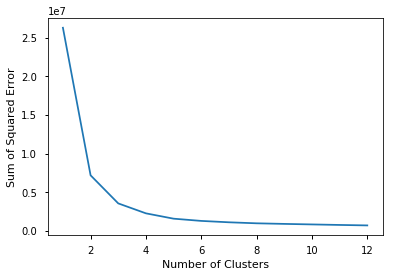

In [14]:
# YOUR CODE HERE
# Change Category data "Rating" from String to Numeric
df_cleaned['rating'] = df_cleaned['rating'].astype("category").cat.codes

# Principal Component Analysis - Dimensionality Reduction
pca = PCA(n_components=2)
df_X = df_cleaned[['rental_duration', 'rental_rate', 'length', 'replacement_cost', 'rating', 'category_id']]
df_X = df_X.dropna()
pca.fit(df_X)
transform = pca.transform(df_X)

# Finding the best number of clusters (k) for KMeans
sse = []
for i in range(1, 13):
    KM = KMeans(n_clusters=i)
    KM.fit(transform)
    sse.append(KM.inertia_)
plt.plot(range(1, 13), sse)
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

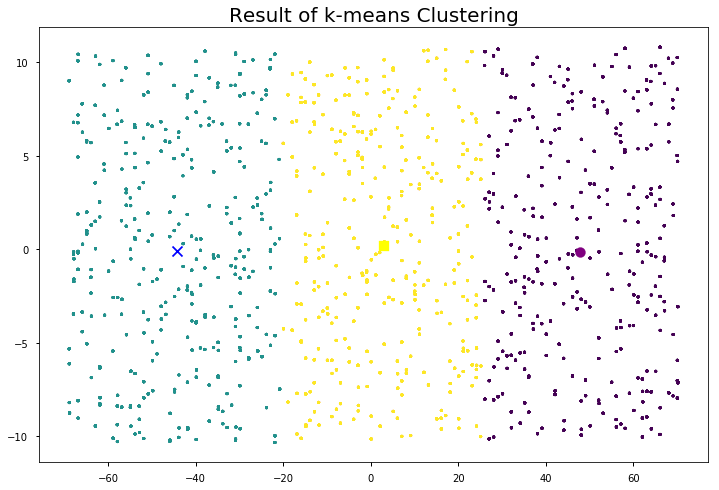

       rental_duration  rental_rate       length  replacement_cost  \
count      4970.000000  4970.000000  4970.000000       4970.000000   
mean          4.974245     3.018974   162.793763         20.474105   
std           1.392611     1.648275    13.556242          6.141900   
min           3.000000     0.990000   141.000000          9.990000   
25%           4.000000     0.990000   150.000000         14.990000   
50%           5.000000     2.990000   163.000000         20.990000   
75%           6.000000     4.990000   176.000000         25.990000   
max           7.000000     4.990000   185.000000         29.990000   

            rating  category_id  cluster  
count  4970.000000  4970.000000   4970.0  
mean      2.211670     8.453521      0.0  
std       1.391065     4.592813      0.0  
min       0.000000     1.000000      0.0  
25%       1.000000     5.000000      0.0  
50%       2.000000     8.000000      0.0  
75%       3.000000    12.000000      0.0  
max       4.000000    16.

In [15]:
# YOUR CODE HERE
# As shows from above, the optimal value of K is 3
km = KMeans(n_clusters=3)
km.fit(transform)
predicted_clusters = km.predict(transform)
centers = km.cluster_centers_

# Draw the centriod
markers = ['o', 'x', 's']
colors = ['purple', 'b', 'yellow']

plt.figure(figsize=(12, 8))
plt.scatter(transform[:, 0], transform[:, 1], c=predicted_clusters, s=7)
for ind in range(len(markers)):
    plt.scatter(centers[ind, 0], centers[ind, 1], c=colors[ind], s=100, marker=markers[ind])
plt.title('Result of k-means Clustering', fontsize=20)
plt.show()

df_X['cluster'] = predicted_clusters
cluster0 = df_X[df_X['cluster'] == 0]
cluster1 = df_X[df_X['cluster'] == 1]
cluster2 = df_X[df_X['cluster'] == 2]

print(cluster0.describe())
print(cluster1.describe())
print(cluster2.describe())

# compare the rating in accordance  within the cluster Visually;
# the number of datapoint in each cluster .
# Check category_id counts in each cluster & try to distinguish them.

In [16]:
# plt.figure(figsize=(12, 8))
# colors = ['purple', 'r', 'yellow']
# for c in range(3):
#     rating_count = df_X[df_X['cluster'] == c].groupby("rating").count().amount
#     plt.bar(rating_count.index, rating_count.values, alpha=(c + 1) * 0.15, color=colors[c])
# plt.show()

AttributeError: 'DataFrame' object has no attribute 'amount'

<Figure size 864x576 with 0 Axes>

#### <span style="color:blue"> Your justifications & commentary here: </span>
- The k value was decided based on using elbow method to find the optimal k clusters such that it has a minimised misrepresentation of cluster. The Point at which there is a significant change in Sum of squared error resulting in a notable, sharp dip in the plot, is the elbow point for the given data.
- Based on the elbow method's result, the appropriate k value (k = 3) is used for clustering.
- The dataset is equally distributed so that the clustering is not obvious and not very meaningful.
- The number of data points in cluster 0 has a notable difference when compared to the other clusters.

#### What do your resulting clusters represent?  Explain the distinguishing characteristics of each cluster. 
<span style= 'float: right;'><b>[2 marks]</b></span>
The resulting cluster represent 

#### <span style="color:blue"> Your answer here: </span>

**

***

### Part 2 - Classification (30 Marks)

The rental company has decided that they want to use simple machine learning to allocate price tags to their movies. The tags are as follows:


|  **Classification**      |  **Requirements**        |
|--------------------------|------------------------- |
|  Cheap                   |  Rental Rate is 0.99   |
|  Moderate                |  Rental Rate is 2.99   |
|  Expensive               |  Rental Rate is 4.99  |


**Your task is to implement a `Classification Algorithm` (such as K-Nearest Neighbours) that can predict the `Price Label` of a movie**. You are required to perform the following tasks:

1. Create useable dataset/s by manually determining the 'truth values' for existing data (where the rating is within the classification system defined above)
2. Implement an algorithm that can predict the classification as per the above classifications.
3. Perform independent testing of the model and provide statistical metrics outlining the performance of your model. Splitting the dataset into testing and training subsets will assist with this.

You are welcome to use any features within the dataset, except the `Rental Rate` of the film. Various attributes relating to a movie in the tables `rating`, `movie`, `film_actor`, `actor` and `film_category` can be helpful while making the algorithm. If required, you can also look to make new **compound attributes** that may be helpful in increasing the accuracy of your model.
You are expected to justify all aspects of your answer including the features used, the metrics provided and validation system employed. Provide commentary on the strengths and potential pitfalls of the model.

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution. This means packages such as Keras, Tensorflow etc are not available for use.</span> 
<span style= 'float: right;'><b>[25 marks total: 18 marks model, 7 marks justification & commentary]</b></span>

In [19]:
# Rental duration for any particular film is the constant 
# We might need to Convert special_features & actos_id_list to dummy variables

# Loading appropriate data
df_classification_original = df_cleaned[["category_id","film_id", "rental_rate", "rating", "length", "rental_duration", "replacement_cost", "amount"]]

# Filling Nas in amounts with the average of amounts
df_amount_mean = df_classification_original.groupby("film_id").agg({"amount": "mean"})
df_classification = df_classification_original.set_index("film_id")
df_classification.amount = df_classification.amount.fillna(df_amount_mean.amount)
df_classification.reset_index()


# Converting categorical data(rating)
le = LabelEncoder()
df_classification.rating = le.fit_transform(df_classification.rating)

# Replacing amounts with it's mean values & joining dataframes based on film_id
df_amount_mean = df_classification.groupby("film_id").agg({"amount": "mean"})


film_frq = df_classification.groupby(by="film_id")['category_id'].count()
# df_classification["film_frequency"]=df_classification.drop(["amount"], axis=1)


df_classification = df_classification.drop(["amount"], axis=1).drop_duplicates()
df_classification = df_classification.join(df_amount_mean, on="film_id")
df_classification['film_rented_count'] = film_frq
df_classification = df_classification.reset_index().drop(["film_id"], axis=1)

df_classification = df_classification.astype(np.int64)  # For KNN function data should be in integers
print(df_classification.head())

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_classification.values, i) for i in range(df_classification.shape[1])]
vif["Features"] = df_classification.columns
vif


df_classification = df_classification.drop('amount',axis=1)
df_classification

   category_id  rental_rate  rating  length  rental_duration  \
0           11            4       4     153                6   
1            6            0       2     130                5   
2           13            4       2     138                3   
3            4            2       0     100                5   
4           10            4       4     165                6   

   replacement_cost  amount  film_rented_count  
0                19       6                 16  
1                15       2                 17  
2                 9       6                 24  
3                11       4                 26  
4                16       5                 30  


,category_id,rental_rate,rating,length,rental_duration,replacement_cost,film_rented_count
0,11,4,4,153,6,19,16
1,6,0,2,130,5,15,17
2,13,4,2,138,3,9,24
3,4,2,0,100,5,11,26
4,10,4,4,165,6,16,30
5,14,0,0,86,3,15,22
6,9,4,4,161,7,22,23
7,11,4,2,85,4,24,24
8,14,2,3,119,4,12,13
9,8,4,2,92,7,9,13


In [20]:
def knn_classification(df_classification,features):
    '''Based on given features,a KNN classification will be done for all possible combinations.
       @param df_classification: The input dataframe whcih contans the dependent variable and the other features
       @param features: A list which contains features which should be recognised by the classification
       @result df_scores: A dataframe which contains all model's Accuracy Scores '''

    #Initialisations
    kvalues=int(np.sqrt(df_classification.shape[0]))
    # Making sure k values is odd.
    kn = KNeighborsClassifier(n_neighbors=(kvalues if kvalues%2!=0 else kvalues+1))
    all_combinations = feature_combinations(df_classification[features], "rental_rate")
    df_scores = pd.DataFrame()

    # C
    for combination in all_combinations:
        x_train, x_test, y_train, y_test = train_test_split(df_classification[list(combination)],
                                                        df_classification.rental_rate, test_size=0.33)
        fit = kn.fit(x_train, y_train)
        df_scores[str(list(combination))] = [np.mean(cross_val_score(kn, x_test, y_test, cv=10, scoring='accuracy'))]
        if (len(combination) > 1):
            for i in range(len(combination) - 1):
            # trying a combination in which dimensionality of the features are reduced using PCA.            
                pca = PCA(n_components=i + 1)
                data_x = pca.fit_transform(df_classification[list(combination)])
                x_train, x_test, y_train, y_test = train_test_split(data_x, df_classification.rental_rate, test_size=0.33)
                fit = kn.fit(x_train, y_train)
                df_scores["PCA_" + str(i + 1) + str(list(combination))] = [np.mean(cross_val_score(kn, data_x, df_classification.rental_rate, cv=10, scoring='accuracy'))]

    df_scores.index = ["Scores"]
    df_scores = df_scores.T
    df_scores = df_scores.sort_values(by=["Scores"], ascending=False)

    # # https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe
    from IPython.display import display
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(df_scores)

In [21]:
knn_classification(df_classification,["category_id", "rental_rate", "rating"])

,Scores
['rating'],0.335834
"PCA_1['category_id', 'rating']",0.334918
['category_id'],0.315995
"['category_id', 'rating']",0.313151


In [22]:
##Support Vector Machines
svmo = svm.SVC(kernel='linear') 
all_combinations=feature_combinations(df_classification,"rental_rate")
df_scores=pd.DataFrame()

for combination in all_combinations:
    x_train,x_test,y_train,y_test=train_test_split(df_classification[list(combination)],df_classification.rental_rate,test_size=0.2)
    svmo = svm.SVC(kernel='linear') # Linear Kernel
    svmo.fit(x_train, y_train)
    y_pred = svmo.predict(x_test)
    df_scores[str(list(combination))]=[metrics.accuracy_score(y_test, y_pred)]
            
df_scores.index=["Scores"]
df_scores=df_scores.T
df_scores=df_scores[df_scores.Scores>0.9].sort_values(by=["Scores"],ascending=False)

# # https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe
from IPython.display import display
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(df_scores)


,Scores


#### <span style="color:blue"> Your justifications & commentary here: </span>

**Firstly, we create the K-Nearest Neighbours algorithmns with the category_id","film_id", "rental_rate", "rating", "length", "rental_duration", "replacement_cost", "amount" and got the perfect score of about 0.97. The results show that we are overfitting the data and determined that some independent variables have multicollinearity to one another. So, we tried to find out by using the variance inflation factor method (VIF) which indicates the variables are not completely independent to each other if the result is over 10. We also find out that the VIF of feature 'amount' is over 27 which shows a very serious multicollinearity. So, we re-ran K-Nearest Neighbours algorithmns without the feature 'amount' and it got the score of 0.4 which is our final prediction.

#### Would you be able to get a better result, if you had used Clustering as a pre-processing step before Classfication? Justify your answer. 
<span style= 'float: right;'><b>[5 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

** It is better to have KMeans clustering as a pre_processing step.By using the Clustering as the pre-processing, it minimizes the limitations that the KNN have in common that has a high level of computation complexity due to the training sample data. It can hace

** The traditional KNN text classification has three limitations.
First, high calculation complexity to find out the k nearest
neighbor samples, all the similarities between the training
samples must be calculated. With less training samples,
calculation time is not significant, but if the training set contains
a huge number of samples, the KNN classifier needs more time
to calculate the similarities.So, it can improve the accuracy, and minimize
processing time. 

Referenced from
Buana, P.W., Jannet, S.D.R.M. and Putra, I.K.G.D., 2012. Combination of k-nearest neighbor and k-means based on term re-weighting for classify Indonesian news. International Journal of Computer Applications, 50(11), pp.37-42.

***

## Section D - Decision Trees (10 Marks)

The following is a small synthetic data set about the weather conditions.  We are
going to try and use decision trees to predict whether it will rain or not on the given day.


|Temperature| Cloudy| UV Index| Humidity| Rain
|---:|--:|--:|--:|--:|
|25|No| Low| Low| No 
|29|No| Low| High| No
|26|No| Low| Medium| No
|26|No| Medium| Medium| No
|27|No| Medium| High| No
|28|No| High | High| No
|25|No| High |Low| No
|29|Yes| Low |Low| Yes
|28|No| Medium| High| Yes
|28|Yes| Medium| High| Yes
|26|No| Low |Low| Yes
|27|Yes| Low |High| Yes

**Note:**
* You can treat temperature as a continuous variable and split it on a range of values (to convert it to a categorical variable, for example).
* Attribute selection in the tree uses information gain.
* You can use LaTeX and/or markdown to format your equations.

In [ ]:
df_rain = pd.read_csv("rain.csv")
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree

replacement_items = {"No": 0, "Yes": 1, "Low": 1, "Medium": 2, "High": 3}
df_rain = df_rain.replace(replacement_items)
df_rain_X = df_rain.drop(labels=['Rain'], axis=1)
df_rain_y = df_rain['Rain']
dt = DecisionTreeClassifier(criterion="entropy", presort=True)
dt.fit(df_rain_X, df_rain_y)
dotf = export_graphviz(dt, out_file='decision_tree.dot')

#### 1. What is the initial entropy of Cloudy?

<span style= 'float: right;'><b>[3 marks]</b></span>


<span style="color:blue">
    
#### By using the formula of entrophy which is $H(X)=\sum_{x\epsilon X} p(x) log_2p(x)$ we get $-\frac{3}{12}(log_2 \frac{3}{12}) -\frac{9}{12}(log_2 \frac{9}{12})$, The result of  initial entropy of Cloudy will be approximately 0.8112



</span>

#### 2. Which attribute would the decision-tree building algorithm choose at the root of the tree?

<span style= 'float: right;'><b>[3 marks]</b></span>

<span style="color:blue">
    
#### Cloudy would be the best attribute for choosing the decision tree building because it has more information gain than the other attributes.


</span>

#### 3. Calculate and specify the information gain of the attribute you chose to split on in the previous question

<span style= 'float: right;'><b>[4 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE


</span>